In [2]:
%config Completer.use_jedi = False

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
from sklearn import preprocessing
from math import exp,log
warnings.filterwarnings( "ignore" )

In [4]:
data=pd.read_csv("dataset_NN.csv")
data1=data.iloc[:,:-1]
data2=data.iloc[:,-1:]
scaler = preprocessing.MinMaxScaler()
names=['att1','att2','att3','att4','att5','att6']
d = scaler.fit_transform(data1)
data = pd.DataFrame(d,columns=names)
data["class"]=data2
print(data)

      att1      att2  att3      att4      att5      att6  class
0      0.5  0.000000   0.0  0.255312  0.119067  0.011200      1
1      0.5  0.000000   0.0  0.206545  0.112746  0.010525      1
2      0.5  0.000000   0.0  0.240309  0.124250  0.008024      1
3      0.5  0.000000   0.0  0.227445  0.090237  0.015839      1
4      0.5  0.000000   0.0  0.210628  0.131742  0.012905      1
...    ...       ...   ...       ...       ...       ...    ...
1995   0.5  0.166667   0.2  0.440092  0.362127  0.240908     10
1996   0.5  0.166667   0.2  0.401433  0.337088  0.235778     10
1997   0.5  0.166667   0.2  0.266863  0.281739  0.144256     10
1998   0.5  0.166667   0.2  0.329503  0.200078  0.166048     10
1999   0.5  0.166667   0.2  0.261156  0.297726  0.146813     10

[2000 rows x 7 columns]


In [5]:
train_data=data.sample(frac=0.7).reset_index(drop=True)	
test_data =data.drop(train_data.index).reset_index(drop=True)
train_data = train_data.reset_index(drop=True)

In [6]:
output_nodes=10
hidden_nodes=8
attributes=train_data.shape[1]-1
wh = np.zeros((attributes,hidden_nodes))
bh = np.zeros(hidden_nodes)
wo = np.zeros((hidden_nodes,output_nodes))
bo = np.zeros(output_nodes)         

In [7]:
lr = 0.001
loss_list = []
x_values=[]

In [8]:
def leaky_relu(x):
	i=0
	for k in x[0]:
		if k>0:
			x[0][i]=k
		else:
			x[0][i]=0
		i+=1		
	return x
def der_leaky(x):
	i=0
	for k in x:
		if k>0:
			x[i]=1
		else:
			x[i]=0
		i+=1		
	return x	
def softmax(x):
	total=0
	i=0
	for k in x[0]:
		x[0][i]=exp(k)
		total+=exp(k)
		i+=1
	i=0	
	for k in x[0]:
		x[0][i]=k/total
		i+=1
	return x		

In [10]:

for itr in range(10):
	d=train_data.sample()
	inp=np.array(d.iloc[:,:-1].values)
	value=d.iloc[:,-1:].values
	output=np.zeros(output_nodes)
	output[value[0]-1]=1
	#forward
	zh=np.dot(inp,wh)+bh   #1*8
	ah=leaky_relu(zh)   #1*8
	zo=np.dot(ah,wo)+bo  # 1*10
	ao=softmax(zo)  #1*10
	#backward
	dcost_dzo=ao-output  #1*10
	dzo_dwo=ah           #1*8
	dcost_dwo=np.dot(dzo_dwo.T,dcost_dzo)  #8*10
	dcost_dbo=ao-output # 1*10
	dzo_dah=wo        #8*10
	dah_dzh=der_leaky(zh[0])  #1*8
	dzh_dwh=inp   #1*6
	dcost_dah=np.dot(dcost_dzo,dzo_dah.T) # 1*8
	dcost_dwh=np.dot(dzh_dwh.T,dcost_dah*dah_dzh)       #6*8
	dcost_dbh=dcost_dah*dah_dzh
	wh=wh-(lr*dcost_dwh)
	bh=bh-(lr*dcost_dbh)
	wo=wo-(lr*dcost_dwo)
	bo=bo-(lr*dcost_dbo)
	loss=0
	if itr%2==0:
		for j in range(output_nodes):
			print(ao)
			print(ao[0][j])
			print(output)
			loss-=(output[j]*log(ao[0][j]))
		loss_list.append(loss)
		x_values.append(itr)

[[0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]]
0.1
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
[[0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]]
0.1
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
[[0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]]
0.1
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
[[0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]]
0.1
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
[[0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]]
0.1
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
[[0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]]
0.1
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
[[0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]]
0.1
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
[[0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]]
0.1
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
[[0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]]
0.1
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
[[0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]]
0.1
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
[[0.09998    0.09998    0.10008003 0.09998    0.09998    0.09998
  0.09998    0.10008001 0.09998    0.09998   ]]
0.0999799950008674
[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
[[0.09998    0.09998    0.10008003 0

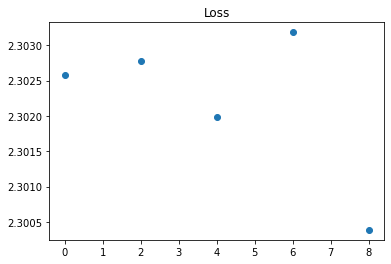

In [11]:
plt.scatter(x_values,loss_list)	
plt.title("Loss")
plt.show()	